In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ds_1 = np.around(abs(np.random.normal(1,1, 2000)*10),2)

In [4]:
ds_1

array([10.21,  4.23,  1.88, ...,  3.73,  4.44,  4.26])

In [5]:
max(ds_1)

43.98

In [6]:
min(ds_1)

0.0

In [196]:
def get_dataset(multiplier=100,count=2000,mean=2, var=1, denom=1):
    ds_1 = np.around(abs(np.random.normal(mean,var,count)*multiplier),denom)
    return ds_1, min(ds_1), max(ds_1)

In [225]:
d1, d1_min, d1_max = get_dataset()

In [227]:
print(d1_max)
print(d1_min)


537.2
1.1


In [26]:
def plot_data(data):
    plt.figure(figsize=(10,10))
    #plt.style.use("seaborn-whitegrid")
    plt.scatter(np.arange(0,len(data)),data, c='r', alpha=0.5, s=45, edgecolors=None)#, 'o--', color="red")

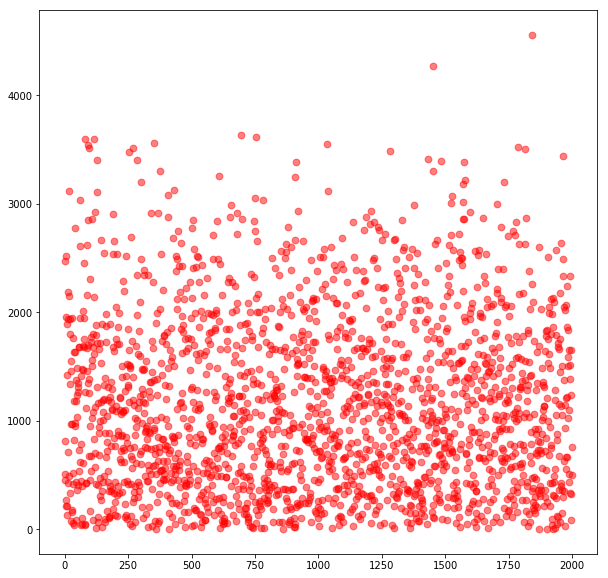

In [27]:
plot_data(d1)

In [28]:
def w_a(threshold, x_0, x_a):
    ln_v = np.log(threshold)
    denm = np.log(1-np.abs((x_0-x_a)/(x_0+x_a)))
    return float(ln_v/denm)

def w_b(threshold, x_0, x_b):
    ln_v = np.log(threshold)
    denm = np.log(1-np.abs((x_b-x_0)/(x_b+x_0)))
    return float(ln_v/denm)

def wx(threshold, x_0, x_a, x_b):
    return np.sqrt(w_a(threshold, x_0, x_a) * w_b(threshold, x_0, x_b))

In [29]:
wx(0.8, 50, d1_min, d1_max)

0.06335839424886659

In [30]:
#d1, d1_min, d1_max = get_dataset()

In [231]:
data_st = np.split(d1,5) # data divided into five parts

avg_list = []
for st in data_st:
    avg_list.append(st.mean())

#=(1-IMABS(M4-40)/IMABS(M4+40))^0.0718314511422105
def index_val(avg_val, min_val, max_val, thresh, x0=50):
    weight = wx(thresh, x0, min_val, max_val)
    dsi = []
    for val in avg_val:
        dsi.append((1-np.abs((val-x0)/(val+x0)))**weight)
    return dsi

In [232]:
dsi = index_val(avg_list, d1_min, d1_max, 0.8, x0=60)

In [233]:
dsi

[0.9168734937376295,
 0.9168192248907981,
 0.9190192224461049,
 0.9146428147857585,
 0.9145322851141118]

In [247]:
def meivnvn(m=1000, c=2000, mn=1, v=1, d=1, thresh=0.8):
    d1, d1_min, d1_max = get_dataset(multiplier=m, count=c, mean=mn, var=v, denom=d)
    data_st = np.split(d1,5) # data divided into five parts
    #print(data_st)

    avg_list = []
    for st in data_st:
        avg_list.append(st.mean())

    val = index_val(avg_list, d1_min, d1_max, thresh)
    return avg_list, val, d1_min, d1_max

In [271]:
a,v,amin,amax = meivnvn(m=10, d=2)

In [272]:
print(a)
print(v)
print(amin)
print(amax)

[11.589850000000002, 11.480524999999998, 11.605599999999999, 11.422450000000001, 11.078074999999998]
[0.7969073107867326, 0.7954829157969036, 0.7971114104798208, 0.7947207410729282, 0.7901203730195293]
0.01
39.99


In [240]:
print(avg_list)
print(dsi)
print(d1_min)
print(d1_max)

[200.35625, 200.51300000000003, 194.24375, 206.88875, 207.21725000000004]
[0.9168734937376295, 0.9168192248907981, 0.9190192224461049, 0.9146428147857585, 0.9145322851141118]
1.1
537.2


In [274]:
usable_data = {
    'DSI': [[11.589850000000002, 11.480524999999998, 11.605599999999999, 11.422450000000001, 11.078074999999998],[0.7969073107867326, 0.7954829157969036, 0.7971114104798208, 0.7947207410729282, 0.7901203730195293],0.01,39.99],
    'AvgVAl': [[200.35625, 200.51300000000003, 194.24375, 206.88875, 207.21725000000004],[0.9168734937376295, 0.9168192248907981, 0.9190192224461049, 0.9146428147857585, 0.9145322851141118],1.1,537.2]
    
}

## Indexing Graphs

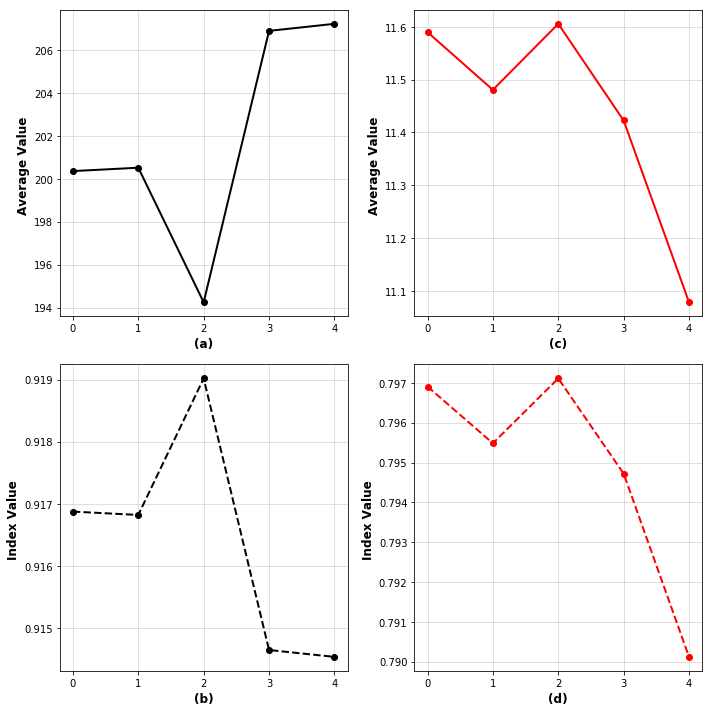

In [295]:
x = range(0,len(avg_list))

# plt.style.use("seaborn-dark-palette")

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.xticks([0,1,2,3,4])
#plt.xlabel("Index")
plt.ylabel("Average Value")
plt.plot(x, avg_list, 'o-', color="black", linewidth=2)
plt.xlabel("(a)", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")
#plt.title("(a)", loc="down")
plt.grid(True, alpha=0.5)

plt.subplot(2,2,3)
plt.plot(x, dsi, 'o--', color="black", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
#plt.ylim((0.8515,0.8565))
#plt.ylim((0.7,0.8))
plt.xlabel("(b)", weight="bold", size="large")
plt.ylabel("Index Value ", weight="bold", size="large")


plt.subplot(2,2,2)
plt.plot(x, a, 'o-', color="r", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.xlabel("(c)", weight="bold", size="large")
#plt.xlabel("Year", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")


plt.subplot(2,2,4)
plt.plot(x, v, 'o--', color="red", linewidth=2)
plt.grid(True, alpha=0.5)
plt.ylabel("Index Value ", weight="bold", size="large")
plt.xticks([0,1,2,3,4])
plt.xlabel("(d)", weight="bold", size="large")
#plt.title("(L) Average Value and subsequent Indexing Value for Boundary Parameteres, (R) Average ")
plt.tight_layout()
plt.savefig("Indexing_main.pdf")

`[12.216325, 11.789925, 11.351025, 11.661425, 11.2435]` <br>
`[0.7597643055504409, 0.7533926973933549, 0.746600753235163, 0.7514293742952597, 0.7448988916894694]`<br>
`0.01`<br>
`43.37`


## $x_0$ Varaition

In [288]:
dsi60 = index_val(avg_list, d1_min, d1_max, 0.8, x0=60)

In [289]:
dsi70 = index_val(avg_list, d1_min, d1_max, 0.8, x0=70)

In [290]:
dsi80 = index_val(avg_list, d1_min, d1_max, 0.8, x0=80)

In [291]:
dsi90 = index_val(avg_list, d1_min, d1_max, 0.8, x0=90)

In [292]:
dsi100 = index_val(avg_list, d1_min, d1_max, 0.8, x0=100)

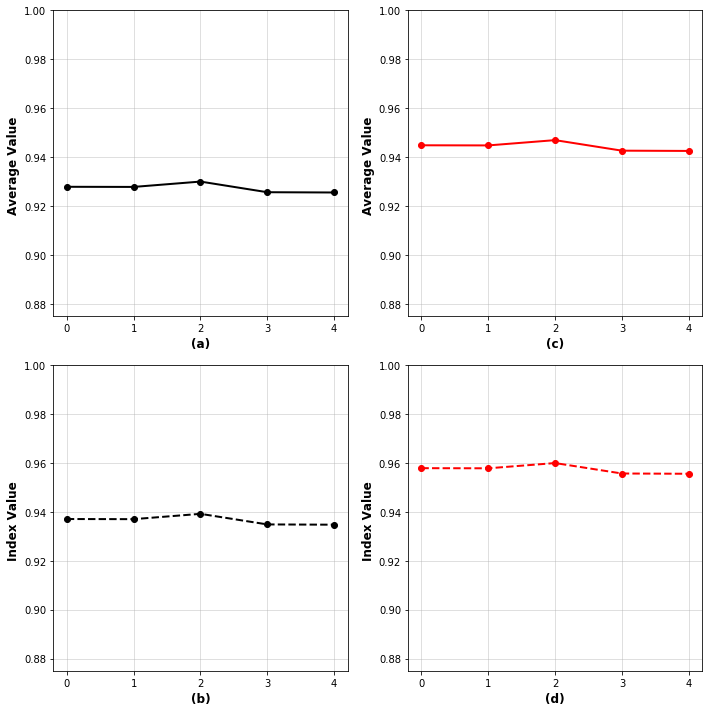

In [313]:
x = range(0,len(avg_list))

#plt.style.use("seaborn-dark-palette")

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.xticks([0,1,2,3,4])
#plt.xlabel("Index")
plt.ylabel("Average Value")
plt.plot(x, dsi60, 'o-', color="black", linewidth=2)
plt.xlabel("(a)", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")
plt.ylim((0.875,1))
#plt.title("(a)", loc="down")
plt.grid(True, alpha=0.5)

plt.subplot(2,2,3)
plt.plot(x, dsi70, 'o--', color="black", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
#plt.ylim((0.8515,0.8565))
#plt.ylim((0.7,0.8))
plt.xlabel("(b)", weight="bold", size="large")
plt.ylabel("Index Value ", weight="bold", size="large")
plt.ylim((0.875,1))

plt.subplot(2,2,2)
plt.plot(x, dsi80, 'o-', color="r", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.xlabel("(c)", weight="bold", size="large")
#plt.xlabel("Year", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")
plt.ylim((0.875,1))

plt.subplot(2,2,4)
plt.plot(x, dsi100, 'o--', color="red", linewidth=2)
plt.grid(True, alpha=0.5)
plt.ylabel("Index Value ", weight="bold", size="large")
plt.xticks([0,1,2,3,4])
plt.ylim((0.875,1))
plt.xlabel("(d)", weight="bold", size="large")
#plt.title("(L) Average Value and subsequent Indexing Value for Boundary Parameteres, (R) Average ")
plt.tight_layout()

plt.savefig("Indexing.pdf")

In [306]:
dsi60t = index_val(avg_list, d1_min, d1_max, thresh = 0.3, x0=100)
dsi70t = index_val(avg_list, d1_min, d1_max, thresh = 0.4, x0=100)
dsi80t = index_val(avg_list, d1_min, d1_max, thresh = 0.5, x0=100)
dsi90t = index_val(avg_list, d1_min, d1_max, thresh = 0.6, x0=100)

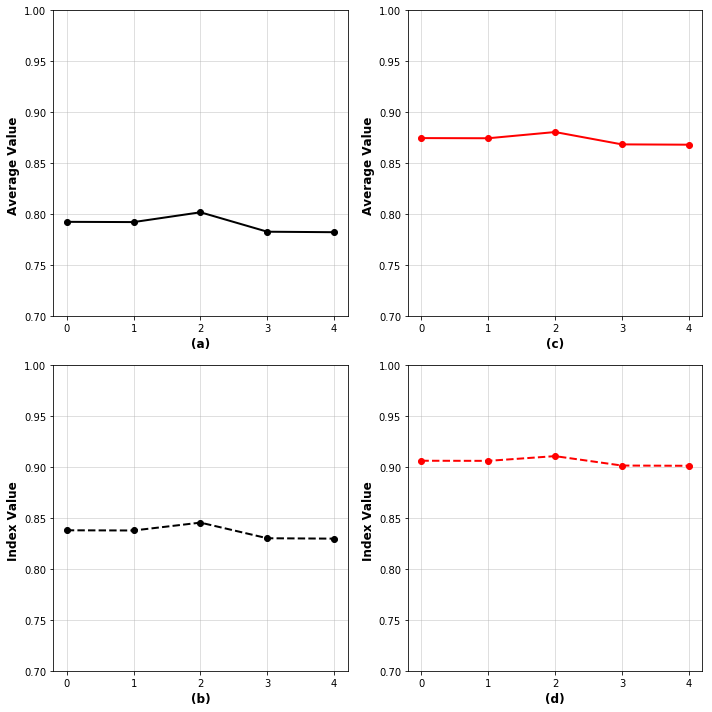

In [317]:
x = range(0,len(avg_list))

#plt.style.use("seaborn-dark-palette")

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.xticks([0,1,2,3,4])
#plt.xlabel("Index")
plt.ylabel("Average Value")
plt.plot(x, dsi60t, 'o-', color="black", linewidth=2)
plt.xlabel("(a)", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")
plt.ylim((0.7,1))

#plt.title("(a)", loc="down")
plt.grid(True, alpha=0.5)

plt.subplot(2,2,3)
plt.plot(x, dsi70t, 'o--', color="black", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.ylim((0.7,1))
#plt.ylim((0.8515,0.8565))
#plt.ylim((0.7,0.8))
plt.xlabel("(b)", weight="bold", size="large")
plt.ylabel("Index Value ", weight="bold", size="large")


plt.subplot(2,2,2)
plt.plot(x, dsi80t, 'o-', color="r", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.xlabel("(c)", weight="bold", size="large")
plt.ylim((0.7,1))
#plt.xlabel("Year", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")


plt.subplot(2,2,4)
plt.plot(x, dsi90t, 'o--', color="red", linewidth=2)
plt.grid(True, alpha=0.5)
plt.ylabel("Index Value ", weight="bold", size="large")
plt.xticks([0,1,2,3,4])
plt.xlabel("(d)", weight="bold", size="large")
plt.ylim((0.7,1))
#plt.title("(L) Average Value and subsequent Indexing Value for Boundary Parameteres, (R) Average ")
plt.tight_layout()
plt.savefig("Indexing.pdf")

In [319]:
avg_val1 = [68.6813165266107,
55.7264876033058,
51.3361933534743,
41.9118126888218,
62.3714156626506,
50.4201215805471,
33.4620329670329]

In [320]:
dsi60t = index_val(avg_val1, 1.03, 684.35, thresh = 0.3, x0=100)
dsi70t = index_val(avg_val1, 1.03, 684.35, thresh = 0.4, x0=100)
dsi80t = index_val(avg_val1, 1.03, 684.35, thresh = 0.5, x0=100)
dsi90t = index_val(avg_val1, 1.03, 684.35, thresh = 0.6, x0=100)

### W.R.T Threshold

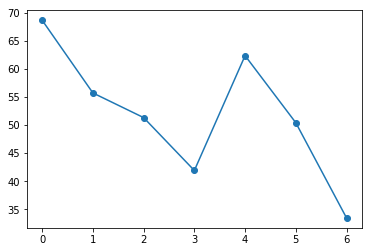

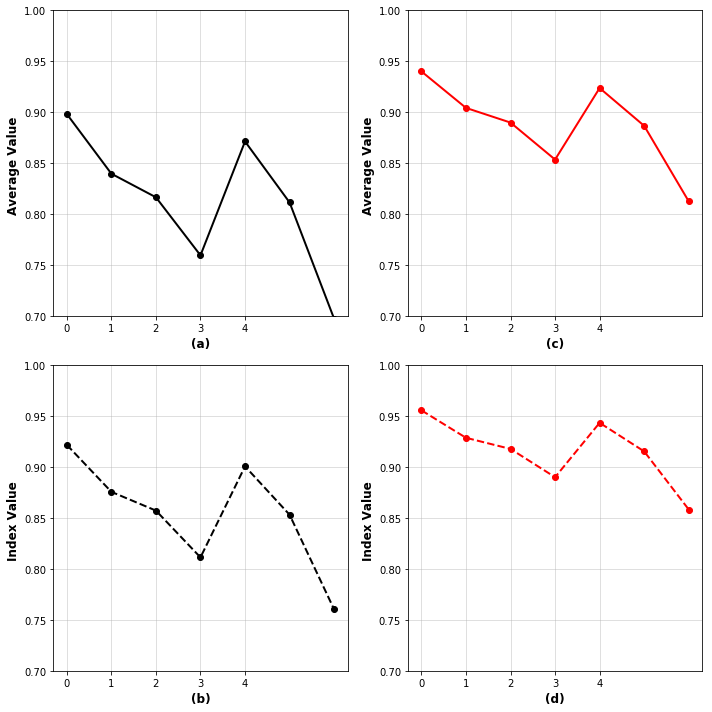

In [325]:
x = range(0,len(avg_val1))

#plt.style.use("seaborn-dark-palette")
plt.plot(avg_val1,'o-')
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.xticks([0,1,2,3,4])
#plt.xlabel("Index")
plt.ylabel("Average Value")
plt.plot(x, dsi60t, 'o-', color="black", linewidth=2)
plt.xlabel("(a)", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")
plt.ylim((0.7,1))

#plt.title("(a)", loc="down")
plt.grid(True, alpha=0.5)

plt.subplot(2,2,3)
plt.plot(x, dsi70t, 'o--', color="black", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.ylim((0.7,1))
#plt.ylim((0.8515,0.8565))
#plt.ylim((0.7,0.8))
plt.xlabel("(b)", weight="bold", size="large")
plt.ylabel("Index Value ", weight="bold", size="large")


plt.subplot(2,2,2)
plt.plot(x, dsi80t, 'o-', color="r", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.xlabel("(c)", weight="bold", size="large")
plt.ylim((0.7,1))
#plt.xlabel("Year", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")


plt.subplot(2,2,4)
plt.plot(x, dsi90t, 'o--', color="red", linewidth=2)
plt.grid(True, alpha=0.5)
plt.ylabel("Index Value ", weight="bold", size="large")
plt.xticks([0,1,2,3,4])
plt.xlabel("(d)", weight="bold", size="large")
plt.ylim((0.7,1))
#plt.title("(L) Average Value and subsequent Indexing Value for Boundary Parameteres, (R) Average ")
plt.tight_layout()
plt.savefig("Indexing-thresh.pdf")

In [326]:
dsi60 = index_val(avg_val1, 1.03, 684.35, thresh = 0.8, x0=80)
dsi70 = index_val(avg_val1, 1.03, 684.35, thresh = 0.8, x0=70)
dsi80 = index_val(avg_val1, 1.03, 684.35, thresh = 0.8, x0=60)
dsi90 = index_val(avg_val1, 1.03, 684.35, thresh = 0.8, x0=50)

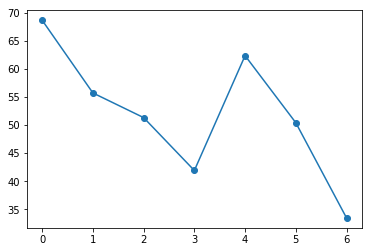

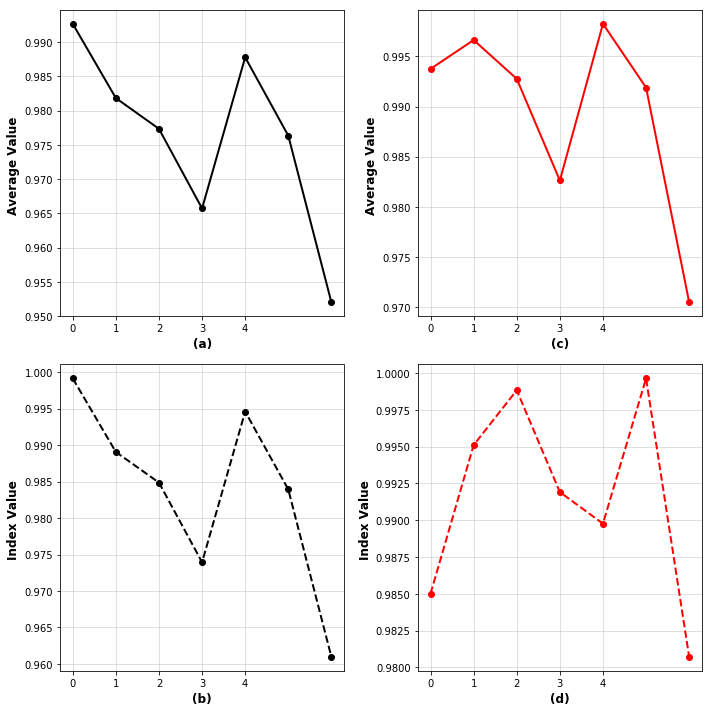

In [328]:
x = range(0,len(avg_val1))

#plt.style.use("seaborn-dark-palette")
plt.plot(avg_val1,'o-')
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.xticks([0,1,2,3,4])
#plt.xlabel("Index")
plt.ylabel("Average Value")
plt.plot(x, dsi60, 'o-', color="black", linewidth=2)
plt.xlabel("(a)", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")
#plt.ylim((0.7,1))

#plt.title("(a)", loc="down")
plt.grid(True, alpha=0.5)

#this one
plt.subplot(2,2,3)
plt.plot(x, dsi70, 'o--', color="black", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
#plt.ylim((0.7,1))
#plt.ylim((0.8515,0.8565))
#plt.ylim((0.7,0.8))
plt.xlabel("(b)", weight="bold", size="large")
plt.ylabel("Index Value ", weight="bold", size="large")


plt.subplot(2,2,2)
plt.plot(x, dsi80, 'o-', color="r", linewidth=2)
plt.grid(True, alpha=0.5)
plt.xticks([0,1,2,3,4])
plt.xlabel("(c)", weight="bold", size="large")
#plt.ylim((0.7,1))
#plt.xlabel("Year", weight="bold", size="large")
plt.ylabel("Average Value ", weight="bold", size="large")


plt.subplot(2,2,4)
plt.plot(x, dsi90, 'o--', color="red", linewidth=2)
plt.grid(True, alpha=0.5)
plt.ylabel("Index Value ", weight="bold", size="large")
plt.xticks([0,1,2,3,4])
plt.xlabel("(d)", weight="bold", size="large")
#plt.ylim((0.7,1))
#plt.title("(L) Average Value and subsequent Indexing Value for Boundary Parameteres, (R) Average ")
plt.tight_layout()
plt.savefig("Indexing-thresh.pdf")